# Importing Libraries

In [214]:
import numpy as np
import pandas as pd
import requests
import lxml
from bs4 import BeautifulSoup
import re
import time
from urllib.request import urlopen

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Data Analysis jobs

In [2]:
resp = requests.get("https://wuzzuf.net/search/jobs/?q=Data+analysis+jobs&a=navbl").text
soup = BeautifulSoup(resp)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"/><meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:title"/><meta content="websit

## Single job in data analysis

In [3]:
title=soup.find('div',attrs={'class':'css-laomuu'}).find('h2').text
title

'Data Analysis Instructor (Excel - Power BI)'

In [4]:
location=soup.find('div',attrs={'class':'css-laomuu'}).find('div',attrs={'class':'css-d7j1kk'}).find('span',attrs={'class':'css-5wys0k'}).text.strip()
location

'Nasr City, Cairo, Egypt'

In [5]:
country=location.split(',')[-1].strip()
country

'Egypt'

In [6]:
# company

company=soup.find('div',attrs={'class':'css-laomuu'}).find('div',attrs={'class':'css-d7j1kk'}).find('a').text[:-2]
company

'EpsilonAI'

In [7]:
# job_types

list_type=soup.find('div',attrs={'class':'css-1lh32fc'}).find_all('a')

job_types=[]
for i in list_type:
    job_types.append(i.find('span').text)

job_types

['Full Time', 'Part Time', 'Freelance / Project']

In [8]:
# The link of the job

link=soup.find('div',attrs={'class':'css-laomuu'}).find('h2').find('a')['href']
job_link='https://wuzzuf.net'+link
job_link

'https://wuzzuf.net/jobs/p/oOKRpUGGzzuO-Data-Analysis-Instructor-Excel---Power-BI-EpsilonAI-Cairo-Egypt?o=1&l=sp&t=sj&a=Data analysis jobs|search-v3|navbl'

In [147]:
# company logo

def comp_logo(page_no, url):
    var = url +str(page_no)+''
    data2 = requests.get(var).text    
    soup2 = BeautifulSoup(data2)
    
    links = []
    for a in soup2.find_all('div',attrs={'class':'css-laomuu'}):
        links.append('https://wuzzuf.net'+ a.find('h2').find('a')['href'])
        
    logos=[]
    div=soup2.find_all('div',{'class':'css-1gatmva e1v1l3u10'})
    for d in div: 
        time.sleep(1)
        dd=d.find('div',{'class':'css-pkv5jc'}).find_all('a')[0]
        if 'href' in dd.attrs:
            l = dd['href']
            l = l.replace(" ", "%20")
            l = l.encode('ascii', 'ignore').decode('ascii')
            resp6 = requests.get(l).text
            soup6 = BeautifulSoup(resp6)
            comp_img=soup6.find('img',{'class':'css-qldhfy'})
            if comp_img==None:
                comp_img=soup6.find('img',{'class':'css-rjfxpv'})
                logos.append("Logo not found, The company doesn't provide an image")
            else:
                logos.append(comp_img['src'])
        else:
            logos.append("Logo not found, the company prefer to keep its name hidden!!")
    
    return links,logos


In [11]:
# description

html=urlopen('https://wuzzuf.net/jobs/p/PVAeMhWwvA6Q-Senior-Data-Scientist-Fixed-Solutions-Cairo-Egypt?o=5&l=sp&t=sj&a=Data%20analysis%20jobs|search-v3|navbl&s=26586397')
soupi=BeautifulSoup(html.read(),'html.parser')
description=[]
desc=soupi.find('div',attrs={'class':'css-1uobp1k'}).find_all('li')
for k in desc:
    description.append(str(k.text).strip())

description

['Design and Develop analytical insights based on unstructured and structured data for industry-scaleanalytical solutions on Cloud and on Prem.',
 'Convert requirements into actual working modules.',
 'Work with Data Scientists and Distinguished Engineers and Architects to solve problems by using analytics as a tool.']

## The Data of the pages that show data anlaysis jobs

## Get_Data function returns all data from each page

In [148]:
# The get_data_from_page function returns:
# (links, titles, locations, companies, job_types)data from searching for jobs in each page

def get_data_from_page(page_no, url):
    var = url +str(page_no)+''
    data = requests.get(var).text    
    soup  = BeautifulSoup(data)
    
    # get links for each job in the page 
    links = []
    for a in soup.find_all('div',attrs={'class':'css-laomuu'}):
        links.append('https://wuzzuf.net'+ a.find('h2').find('a')['href'])
    
    # get title for each job in the page
    titles=[]
    for i in soup.find_all('div',attrs={'class':'css-laomuu'}):
        titles.append(i.find('h2').text)
    
    # get location for each company in the page
    locations=[]
    for i in soup.find_all('div',attrs={'class':'css-laomuu'}):
        locations.append(i.find('div',attrs={'class':'css-d7j1kk'}).find('span',attrs={'class':'css-5wys0k'}).text.strip())
    
    # get company name for each job in the page
    companies=[]
    for i in soup.find_all('div',attrs={'class':'css-laomuu'}):
        companies.append(i.find('div',attrs={'class':'css-d7j1kk'}).find('a').text[:-2])
    time.sleep(3)
    # get type for each job in the page
    job_types=[]
    for i in soup.find_all('div',attrs={'class':'css-1lh32fc'}):
        types=[]
        for j in i.find_all('a'):
            types.append(j.find('span').text)
        job_types.append(types)
    
    time.sleep(3)
    # get company link for each job in the page
    comp_links=[]
    ss=soup.find_all('div',attrs={'class':'css-laomuu'})
    for i in ss:
        company_link = i.find('div',attrs={'class':'css-d7j1kk'}).find('a')
        if 'href' in company_link.attrs:
            l = company_link['href']
            l = l.replace(" ", "%20")
            l = l.encode('ascii', 'ignore').decode('ascii')
            comp_links.append(l)
        else:
            comp_links.append('Link not found, the company prefer to keep its name hidden!!')

    time.sleep(5)

    desc_i=[]
    for i in links:
        time.sleep(2)
        i = i.replace(" ", "%20")
        i = i.encode('ascii', 'ignore').decode('ascii')
        html=urlopen(i)
        soupi=BeautifulSoup(html.read(),'html.parser')
        description=[]
        desc=soupi.find('div',attrs={'class':'css-1uobp1k'}).find_all('li')
        if desc==[]:
            desc=soupi.find('div',attrs={'class':'css-1uobp1k'}).find_all('p')
        for k in desc:
            description.append(str(k.text).strip())
        desc_i.append(description)
    
    return links,titles, locations, companies, job_types, comp_links, desc_i

In [43]:
# It is used for the data pages returned from searching for data analysis jobs

# page 1

data_0=get_data_from_page(0, 'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

In [38]:
# page 2

data_1=get_data_from_page(1, 'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

In [42]:
# page 3

data_2=get_data_from_page(2, 'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

## temporary data frame for data analysis jobs

In [44]:
# adding data for all pages together

links_da= data_0[0]+ data_1[0]+ data_2[0]
title_da= data_0[1]+ data_1[1]+ data_2[1]
location_da= data_0[2]+ data_1[2]+ data_2[2]
company_da= data_0[3]+ data_1[3]+ data_2[3]
type_da= data_0[4]+ data_1[4]+ data_2[4]
comp_links_da= data_0[-2]+ data_1[-2]+ data_2[-2]
desc_da= data_0[-1]+ data_1[-1]+ data_2[-1]

In [45]:
print(len(links_da))
print(len(title_da))
print(len(company_da))
print(len(location_da))
print(len(type_da))
print(len(desc_da))
print(len(comp_links_da))


45
45
45
45
45
45
45


In [118]:
comp_logo_data_1=comp_logo(0,'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

In [119]:
comp_logo_data_2=comp_logo(1,'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

In [120]:
comp_logo_data_3=comp_logo(2,'https://wuzzuf.net/search/jobs/?a=navbl&q=Data%20analysis%20jobs&start=')

In [121]:
comp_logo_link_da= comp_logo_data_1[1]+comp_logo_data_2[1]+comp_logo_data_3[1]
cl_job_link_da= comp_logo_data_1[0]+comp_logo_data_2[0]+comp_logo_data_3[0]

In [122]:
df_da_comp_logo=pd.DataFrame({'links':cl_job_link_da, 'comp_logo_link':comp_logo_link_da})

In [123]:
# dictionary of lists from each job inforamtion

job_dict_da={'title':title_da, 'company':company_da,'location':location_da, 'type':type_da,
             'links':links_da, 'description':desc_da, 'company_link':comp_links_da}

In [124]:
df_data_da = pd.DataFrame(job_dict_da)

In [125]:
df_da= df_data_da.merge(df_da_comp_logo, on='links')

In [126]:
df_da.head()

,title,company,location,type,links,description,company_link,comp_logo_link
0,Data Analysis Instructor (Excel - Power BI),EpsilonAI,"Nasr City, Cairo, Egypt","[Full Time, Part Time, Freelance / Project]",https://wuzzuf.net/jobs/p/oOKRpUGGzzuO-Data-An...,"[As a Data Analysis Instructor, you will guide...",https://wuzzuf.net/jobs/careers/EpsilonAI-Egyp...,https://images.wuzzuf-data.net/files/company_l...
1,Senior Data Analyst - Cairo,Confidential,"Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/R7KdIv7dCm0z-Senior-...,[1. Responsible for preparing and analyzing da...,"Link not found, the company prefer to keep its...","Logo not found, the company prefer to keep its..."
2,Data Analyst,Hands of Hope Physical Therapy & Wellness,"Maadi, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/9AAaTU2msaG5-Data-An...,"[Track, collect, and interpret data, then anal...",https://wuzzuf.net/jobs/careers/Hands%20of%20H...,https://images.wuzzuf-data.net/files/company_l...
3,Data Analyst,Gila Electric,"New Cairo, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/adeG14H7rqQA-Data-An...,"[Interpret data, analyze results using statist...",https://wuzzuf.net/jobs/careers/Gila-Electric-...,https://images.wuzzuf-data.net/files/company_l...
4,Senior Data Scientist,Fixed Solutions,"Sheraton, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/PVAeMhWwvA6Q-Senior-...,[Design and Develop analytical insights based ...,https://wuzzuf.net/jobs/careers/Fixed-Solution...,https://images.wuzzuf-data.net/files/company_l...


---

# 2. Machine Learning jobs

In [76]:
ml_req = requests.get("https://wuzzuf.net/search/jobs/?q=machine+learning+jobs&a=navbl").text
soup_ml = BeautifulSoup(ml_req)
soup_ml

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"/><meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:title"/><meta content="websit

## The Data of the pages that show Machine Learning jobs

## Get_Data function returns all data from each page

In [81]:
# It is used for the data pages returned from searching for machine learning jobs

# page 1

ml_data_0=get_data_from_page(0, 'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

In [80]:
# page 2

ml_data_1=get_data_from_page(1, 'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

In [79]:
# page 3

ml_data_2=get_data_from_page(2, 'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

## temporary data frame for Machine Learning jobs

In [82]:
links_ml= ml_data_0[0]+ ml_data_1[0]+ ml_data_2[0]
title_ml= ml_data_0[1]+ ml_data_1[1]+ ml_data_2[1]
location_ml= ml_data_0[2]+ ml_data_1[2]+ ml_data_2[2]
company_ml= ml_data_0[3]+ ml_data_1[3]+ ml_data_2[3]
type_ml= ml_data_0[4]+ ml_data_1[4]+ ml_data_2[4]
comp_links_ml= ml_data_0[-2]+ ml_data_1[-2]+ ml_data_2[-2]
desc_ml= ml_data_0[-1]+ ml_data_1[-1]+ ml_data_2[-1]

In [114]:
comp_logo_data_ml1=comp_logo(0,'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

In [115]:
comp_logo_data_ml2=comp_logo(1,'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

In [116]:
comp_logo_data_ml3=comp_logo(2,'https://wuzzuf.net/search/jobs/?a=navbl&q=machine%20learning%20jobs&start=')

In [127]:
comp_logo_link_ml= comp_logo_data_ml1[1]+comp_logo_data_ml2[1]+comp_logo_data_ml3[1]
cl_job_link_ml= comp_logo_data_ml1[0]+comp_logo_data_ml2[0]+comp_logo_data_ml3[0]

In [129]:
df_ml_comp_logo=pd.DataFrame({'links':cl_job_link_ml, 'comp_logo_link':comp_logo_link_ml})

In [130]:
# dictionary of lists from each job inforamtion

job_dict_ml={'title':title_ml, 'company':company_ml,'location':location_ml, 'type':type_ml,
             'links':links_ml, 'description':desc_ml, 'company_link':comp_links_ml}

In [131]:
df_data_ml = pd.DataFrame(job_dict_ml)

In [132]:
df_ml= df_data_ml.merge(df_ml_comp_logo, on='links')

In [133]:
df_ml.head()

,title,company,location,type,links,description,company_link,comp_logo_link
0,Senior/Mid Senior Deep Learning Engineer,Confidential,"Mokattam, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/5NFxSMKMH5K0-SeniorM...,"[Reviewing, replicating, and mapping research ...","Link not found, the company prefer to keep its...","Logo not found, the company prefer to keep its..."
1,ML Engineer - Recommendation System,TensorGraph,"Maadi, Cairo, Egypt","[Part Time, Freelance / Project]",https://wuzzuf.net/jobs/p/bevYQMKRLEmI-ML-Engi...,[Build and Improve the existing recommendation...,https://wuzzuf.net/jobs/careers/TensorGraph-Eg...,https://images.wuzzuf-data.net/files/company_l...
2,Internship - Graduates,Trufla,"Heliopolis, Cairo, Egypt",[Internship],https://wuzzuf.net/internship/zF1Yie2Xk7e0-Int...,"[Think insurance is boring? Think again., Truf...",https://wuzzuf.net/jobs/careers/Trufla-Egypt-1...,https://images.wuzzuf-data.net/files/company_l...
3,Data Scientist,Confidential,"Riyadh, Saudi Arabia",[Full Time],https://wuzzuf.net/jobs/p/OjuPwsoJjnOC-Data-Sc...,"[Selecting features, building, and optimizing ...","Link not found, the company prefer to keep its...","Logo not found, the company prefer to keep its..."
4,Senior Data Scientist,BBI-Consultancy,"Nasr City, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/jX5wf4UC6hGY-Senior-...,[Identify valuable data sources and automate c...,https://wuzzuf.net/jobs/careers/BBI-Consultanc...,https://images.wuzzuf-data.net/files/company_l...


---

# 3. Software Testing jobs

In [88]:
st_req = requests.get("https://wuzzuf.net/search/jobs/?q=software+testing+jobs&a=navbl").text
soup_st = BeautifulSoup(st_req)
soup_st

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, shrink-to-fit=no" name="viewport"/>
<title data-react-helmet="true">Job Search | WUZZUF</title>
<meta charset="utf-8" data-react-helmet="true"/><meta content="Searching for jobs in Egypt? Wuzzuf helps you in your online job search to find Jobs in Egypt and Middle East. Choose the right job using our online recruitment services." data-react-helmet="true" name="description"/><meta content="jobs in Egypt, job in Egypt, careers egypt, jobs in Cairo, jobs in alexandria, employment in egypt, Egypt jobs, jobs vacancies, job vacancies in egypt, job search egypt, job vacancies egypt, job recruitment in egypt, job opportunities in egypt, jobs cairo, job vacancy egypt , وظائف مصر" data-react-helmet="true" name="keywords"/><meta content="Jobs in Egypt | WUZZUF" data-react-helmet="true" property="og:title"/><meta content="websit

## The Data of the pages that show Software Testing jobs

## Get_Data function returns all data from each page

In [134]:
# It is used for the data pages returned from searching for Software testing jobs

# page 1

st_data_0=get_data_from_page(0, 'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

In [149]:
# page 2

st_data_1=get_data_from_page(1, 'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

In [145]:
# page 3

st_data_2=get_data_from_page(2, 'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

## temporary data frame for Software Testing jobs

In [150]:
links_st= st_data_0[0]+ st_data_1[0]+ st_data_2[0]
title_st= st_data_0[1]+ st_data_1[1]+ st_data_2[1]
location_st= st_data_0[2]+ st_data_1[2]+ st_data_2[2]
company_st= st_data_0[3]+ st_data_1[3]+ st_data_2[3]
type_st= st_data_0[4]+ st_data_1[4]+ st_data_2[4]
comp_links_st= st_data_0[-2]+ st_data_1[-2]+ st_data_2[-2]
desc_st= st_data_0[-1]+ st_data_1[-1]+ st_data_2[-1]


In [151]:
comp_logo_data_st1=comp_logo(0,'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

In [152]:
comp_logo_data_st2=comp_logo(1,'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

In [153]:
comp_logo_data_st3=comp_logo(2,'https://wuzzuf.net/search/jobs/?a=navbl&q=software%20testing%20jobs&start=')

In [154]:
comp_logo_link_st= comp_logo_data_st1[1]+comp_logo_data_st2[1]+comp_logo_data_st3[1]
cl_job_link_st= comp_logo_data_st1[0]+comp_logo_data_st2[0]+comp_logo_data_st3[0]

In [155]:
df_st_comp_logo=pd.DataFrame({'links':cl_job_link_st, 'comp_logo_link':comp_logo_link_st})

In [156]:
# dictionary of lists from each job inforamtion

job_dict_st={'title':title_st, 'company':company_st,'location':location_st, 'type':type_st,
             'links':links_st, 'description':desc_st, 'company_link':comp_links_st}

In [157]:
df_data_st = pd.DataFrame(job_dict_st)

In [158]:
df_st= df_data_st.merge(df_st_comp_logo, on='links')

In [165]:
df_st.head()

,title,company,location,type,links,description,company_link,comp_logo_link
0,Software Testing Engineer,realme,"New Cairo, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/cV4gzLyytV0p-Softwar...,[Follow testing schedule and plan according to...,https://wuzzuf.net/jobs/careers/realme-Egypt-3...,https://images.wuzzuf-data.net/files/company_l...
1,Senior Software Test Engineer,Glamera,"Nasr City, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/MILBC3MTiWEf-Senior-...,"[Design test strategies, specifications, and t...",https://wuzzuf.net/jobs/careers/Glamera-Egypt-...,https://images.wuzzuf-data.net/files/company_l...
2,Software Testing Engineer,DMS,"Heliopolis, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/F4OUBTyLywH7-Softwar...,[Reviewing and analyzing system specifications...,https://wuzzuf.net/jobs/careers/DMS-Egypt-6118,https://images.wuzzuf-data.net/files/company_l...
3,Trevipay| Senior Software Testing Engineer - E...,Kalasko,"Hurghada, Red Sea, Egypt",[Full Time],https://wuzzuf.net/jobs/p/R4xwRMMNrQpe-Trevipa...,[Lead tester on small engineering team for bus...,https://wuzzuf.net/jobs/careers/Kalasko-Egypt-...,https://images.wuzzuf-data.net/files/company_l...
4,Software Quality Testing Engineer,Anspire Agency,"New Cairo, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/LSD2KVR0tRuB-Softwar...,[Attend the Analyst orientation session (Kick-...,https://wuzzuf.net/jobs/careers/Anspire-Agency...,https://images.wuzzuf-data.net/files/company_l...


---

# Whole DataFrame

In [166]:
df = pd.concat([df_da,df_ml,df_st],ignore_index=True)

In [167]:
df

,title,company,location,type,links,description,company_link,comp_logo_link
0,Data Analysis Instructor (Excel - Power BI),EpsilonAI,"Nasr City, Cairo, Egypt","[Full Time, Part Time, Freelance / Project]",https://wuzzuf.net/jobs/p/oOKRpUGGzzuO-Data-An...,"[As a Data Analysis Instructor, you will guide...",https://wuzzuf.net/jobs/careers/EpsilonAI-Egyp...,https://images.wuzzuf-data.net/files/company_l...
1,Senior Data Analyst - Cairo,Confidential,"Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/R7KdIv7dCm0z-Senior-...,[1. Responsible for preparing and analyzing da...,"Link not found, the company prefer to keep its...","Logo not found, the company prefer to keep its..."
2,Data Analyst,Hands of Hope Physical Therapy & Wellness,"Maadi, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/9AAaTU2msaG5-Data-An...,"[Track, collect, and interpret data, then anal...",https://wuzzuf.net/jobs/careers/Hands%20of%20H...,https://images.wuzzuf-data.net/files/company_l...
3,Data Analyst,Gila Electric,"New Cairo, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/adeG14H7rqQA-Data-An...,"[Interpret data, analyze results using statist...",https://wuzzuf.net/jobs/careers/Gila-Electric-...,https://images.wuzzuf-data.net/files/company_l...
4,Senior Data Scientist,Fixed Solutions,"Sheraton, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/PVAeMhWwvA6Q-Senior-...,[Design and Develop analytical insights based ...,https://wuzzuf.net/jobs/careers/Fixed-Solution...,https://images.wuzzuf-data.net/files/company_l...
...,...,...,...,...,...,...,...,...
123,Senior Software Quality Control,Confidential,"Giza, Egypt",[Full Time],https://wuzzuf.net/jobs/p/SyUIjILYnA0b-Senior-...,[Leading and collaborating with software teste...,"Link not found, the company prefer to keep its...","Logo not found, the company prefer to keep its..."
124,Senior Software Engineer,OneCommerce,"Maadi, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/33Rk7IjKq5U1-Senior-...,[You are a passionate senior software engineer...,https://wuzzuf.net/jobs/careers/OneCommerce-Eg...,https://images.wuzzuf-data.net/files/company_l...
125,Senior Software Quality Assurance Specialist,Smart IT,"Nasr City, Cairo, Egypt",[Full Time],https://wuzzuf.net/jobs/p/UpR1I2cuiQQz-Senior-...,[Develops automated testing systems using comm...,https://wuzzuf.net/jobs/careers/Smart-IT-Egypt...,https://images.wuzzuf-data.net/files/company_l...
126,Software Quality Control Engineer,Kick Start Interactive,"Dokki, Giza, Egypt",[Full Time],https://wuzzuf.net/jobs/p/RGydm1PudXnV-Softwar...,"[Create detailed, comprehensive, and well-stru...",https://wuzzuf.net/jobs/careers/Kick-Start-Int...,https://images.wuzzuf-data.net/files/company_l...


# Convert to Excel sheet

In [168]:
df.to_csv('Jobs_updated.csv',index=False)

# Data Analysis

### show the locations that have the most companies

In [240]:
locations=df.groupby('location')['company'].count().sort_values(ascending=False)

In [252]:
location_count=pd.DataFrame(locations)
location_count

,company
location,
"Maadi, Cairo, Egypt",22
"Cairo, Egypt",20
"New Cairo, Cairo, Egypt",16
"Nasr City, Cairo, Egypt",16
"Dokki, Giza, Egypt",9
"6th of October, Giza, Egypt",8
"Sheikh Zayed, Giza, Egypt",7
"Heliopolis, Cairo, Egypt",6
"Sheraton, Cairo, Egypt",5


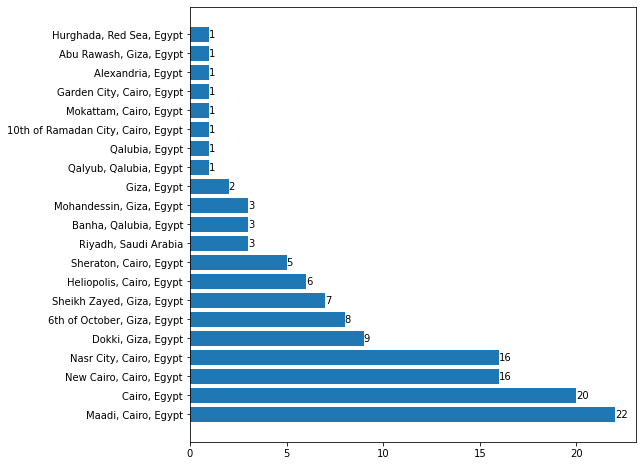

In [283]:
fig, ax = plt.subplots(figsize=(8,8))
bars = ax.barh(location_count.index,location_count['company'])
ax.bar_label(bars)
plt.show()

### show the most 10 companies that offer jobs

In [284]:
companies=df.groupby('company')['company'].count().sort_values(ascending=False)

In [294]:
companies_count=pd.DataFrame(companies)
companies_count=companies_count.head(10)

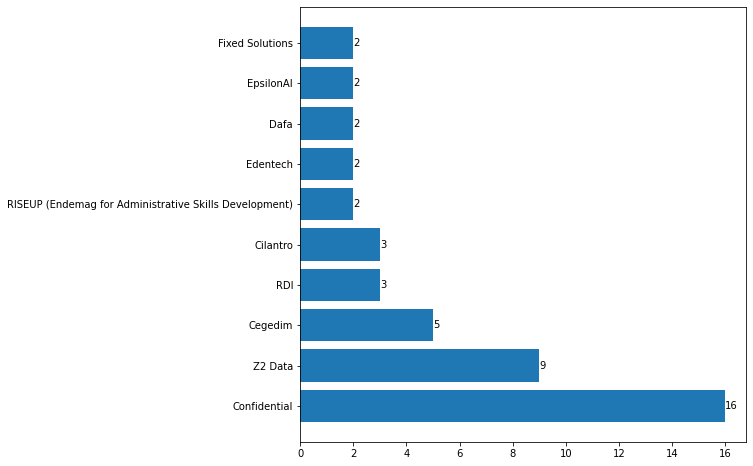

In [295]:
fig, ax = plt.subplots(figsize=(8,8))
bars = ax.barh(companies_count.index,companies_count['company'])
ax.bar_label(bars)
plt.show()

### show all the types of jobs

In [209]:
jobs=[]
for i in df['type']:
    for j in i:
        if j not in jobs:
            jobs.append(j)
print(jobs)

['Full Time', 'Part Time', 'Freelance / Project', 'Work From Home', 'Internship', 'Shift Based']


### Count the number of jobs in each type of jobs

In [213]:
full, part, freelance_project, Work_from_home, internship, shift_based, other=(0,0,0,0,0,0,0)

for i in df['type']:
    for j in i:
        if j=="Full Time":
            full+=1
        elif j=="Part Time":
            part+=1
        elif j=="Freelance / Project":
            freelance_project+=1
        elif j=="Work From Home":
            Work_from_home+=1
        elif j=="Internship":
            internship+=1
        elif j=="Shift Based":
            shift_based+=1
        else:
            other+=1
job_type=['Full Time', 'Part Time', 'Freelance / Project', 'Work From Home', 'Internship', 'Shift Based', "Other"]
job_list=[full, part, freelance_project, Work_from_home, internship, shift_based, other]
for i in range(len(job_list)):
    print(f"Number of {job_type[i]} jobs: {job_list[i]}")


Number of Full Time jobs: 123
Number of Part Time jobs: 4
Number of Freelance / Project jobs: 3
Number of Work From Home jobs: 12
Number of Internship jobs: 1
Number of Shift Based jobs: 1
Number of Other jobs: 0


In [281]:
job_dict={'type':job_type,'count':job_list}
df_data = pd.DataFrame(job_dict)
df_data= df_data.sort_values('count', ascending=False)
df_data

,type,count
0,Full Time,123
3,Work From Home,12
1,Part Time,4
2,Freelance / Project,3
4,Internship,1
5,Shift Based,1
6,Other,0


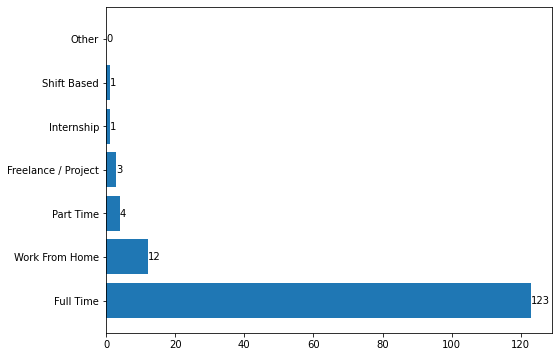

In [282]:
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(df_data['type'],df_data['count'])
ax.bar_label(bars)
plt.show()